# 😀Project 1: Image Classification

---

## 1. VGG16 모델

In [2]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
# train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [5]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
# 필요한 파라미터를 설정
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [8]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [10]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
# Data Augmentation이 제대로 되었는지 확인
train_data_gen[0][0].shape

(16, 256, 256, 3)

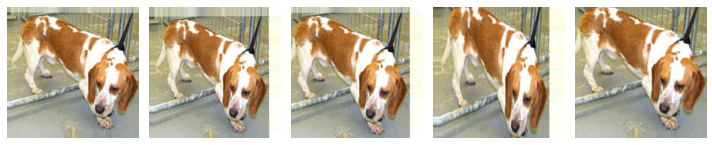

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [14]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


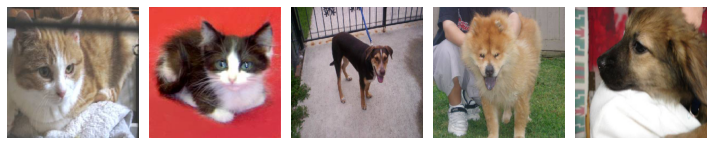

In [15]:
# Validation 데이터를 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [16]:
_[:5] # 정답 데이터

array([0., 0., 1., 1., 1.], dtype=float32)

In [17]:
# # 문제 1-2. hyperparameter 설정
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# import os
# import tensorflow as tf

# # VGG16 모델 구현
# input_layer = Input(shape=(256, 256, 3))

# # Block 1
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# # Block 2
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# # Block 3
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# # Block 4
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# # Block 5
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# # Flatten and fully connected layers
# x = Flatten()(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)  # Added dropout for regularization
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)  # Added dropout for regularization
# x = Dense(1000, activation='relu')(x) 
# output_layer = Dense(1, activation='sigmoid')(x) 

# # 모델 생성
# model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
# model.summary()

# loss_function = tf.keras.losses.binary_crossentropy
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjusted learning rate
# metric = tf.keras.metrics.binary_accuracy
# model.compile(loss=loss_function,
#               optimizer=optimizer,
#               metrics=[metric])

# # 데이터 로드 및 전처리 부분은 별도로 제공된다고 가정하겠습니다.
# # train_data_gen, val_data_gen은 적절한 데이터 생성기로 대체되어야 합니다.

# history = model.fit(
#     train_data_gen,
#     steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=(len(os.listdir(val_cats_dir)) + len(os.listdir(val_dogs_dir))) // batch_size,
#     callbacks=callbacks_list,
#     validation_freq=1
# )

# # 그래프 그리기
# acc = history.history['binary_accuracy']
# val_acc = history.history['val_binary_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(15, 5))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')

# plt.show()


---

#### 다양한 방법을 사용하여 모델의 성능 올리기  
hyperparameter 변경, 모델 수정, optimizer 변경, skip connection, pre-trained model 등 다양한 방법을 사용하면 모델의 성능을 높일 수 있다. 다양한 실험을 통해 성능을 올려 보자.

In [18]:
# 문제 1-2. hyperparameter 설정
batch_size = 16
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [19]:
# 데이터 generator 생성
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.1,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.4,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.  
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam
# VGG16 모델 구현
input_layer = Input(shape=(256, 256, 3))

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 2
shortcut = x
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
shortcut = x
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
shortcut = x
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
shortcut = x
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten and fully connected layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(2048, activation='relu')(x)
x = Dense(1000, activation='relu')(x) 
output_layer = Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 256, 256, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 256, 256, 128 73856       conv2d_13[0][0]                  
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 256, 256, 128 512         conv2d_14[0][0]                  
______________________________________________________________________________________________

In [21]:
# loss function, optimizer, metric 설정 및 모델 컴파일
loss_function = tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
metric = tf.keras.metrics.binary_accuracy

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=[metric])

In [1]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

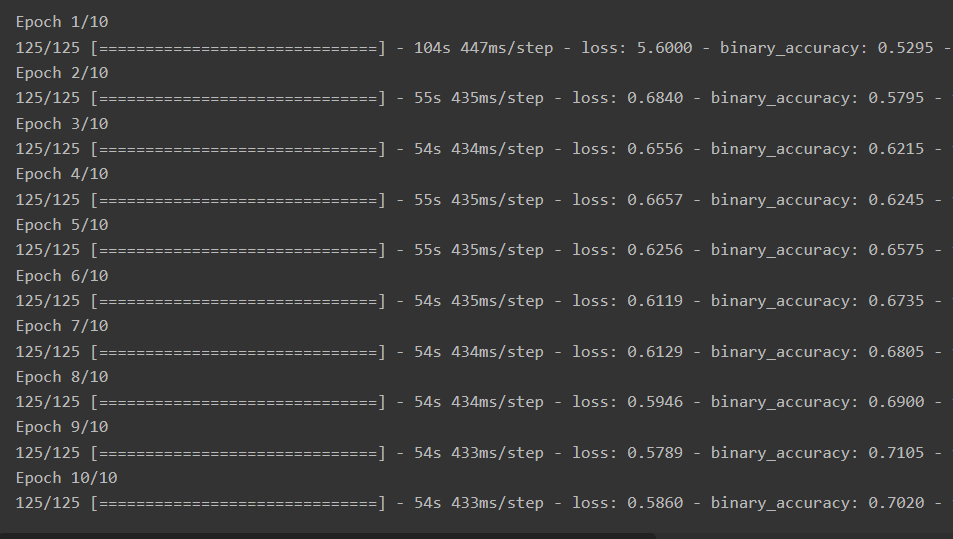

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

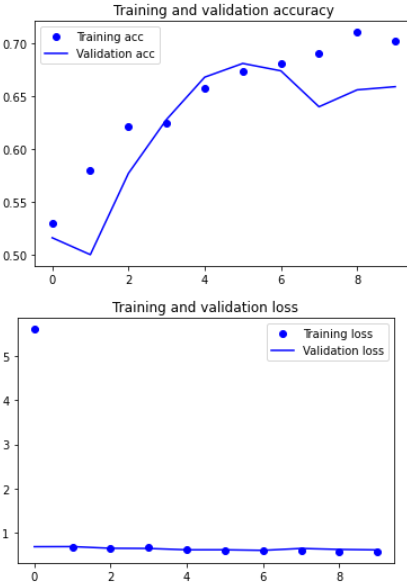

---

## 프로젝트 2: Object Detection

In [ ]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [ ]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [ ]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

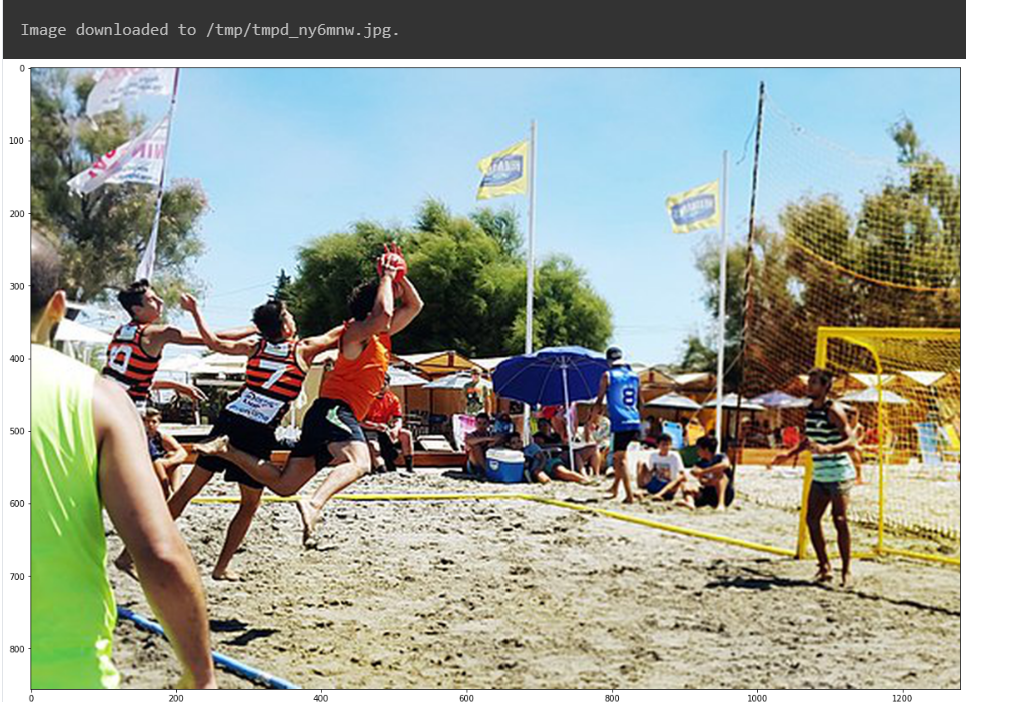

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

In [ ]:
run_detector(detector, downloaded_image_path)

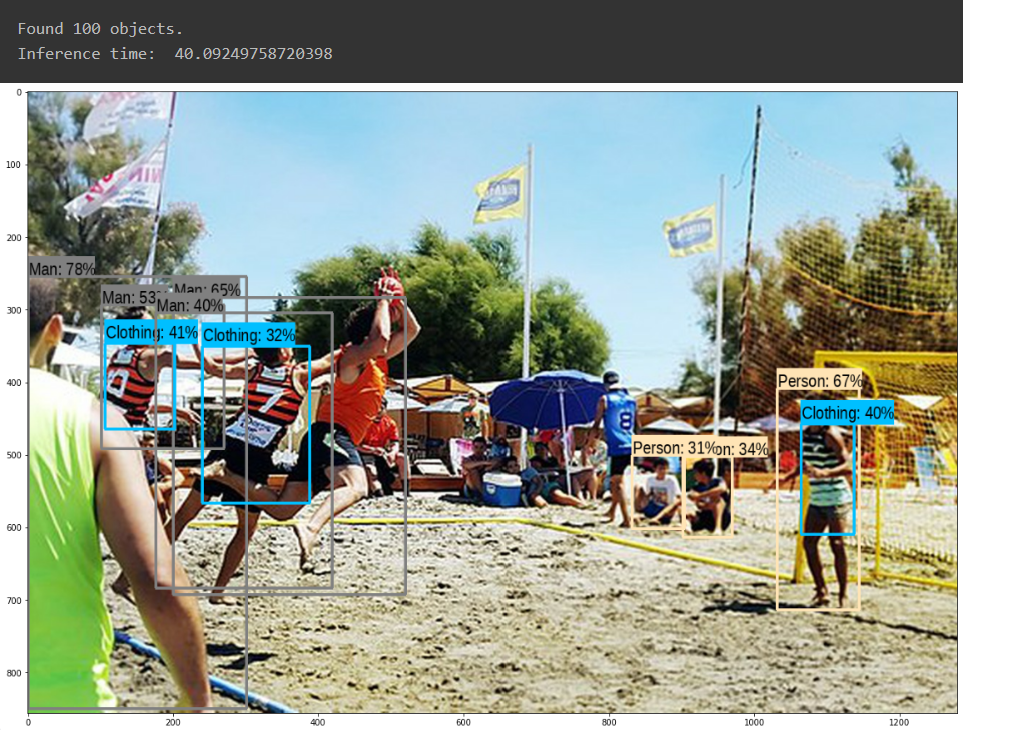

#### 문제 2-1. 다른 이미지 테스트해보기

In [ ]:
# 이미지 불러오기
image_url ="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fimg.lovepik.com%2Fphoto%2F20211124%2Fmedium%2Flovepik-the-family-camped-and-played-football-picture_500933906.jpg&type=sc960_832"
downloaded_image_path = download_and_resize_image(image_url, 768, 512, True)

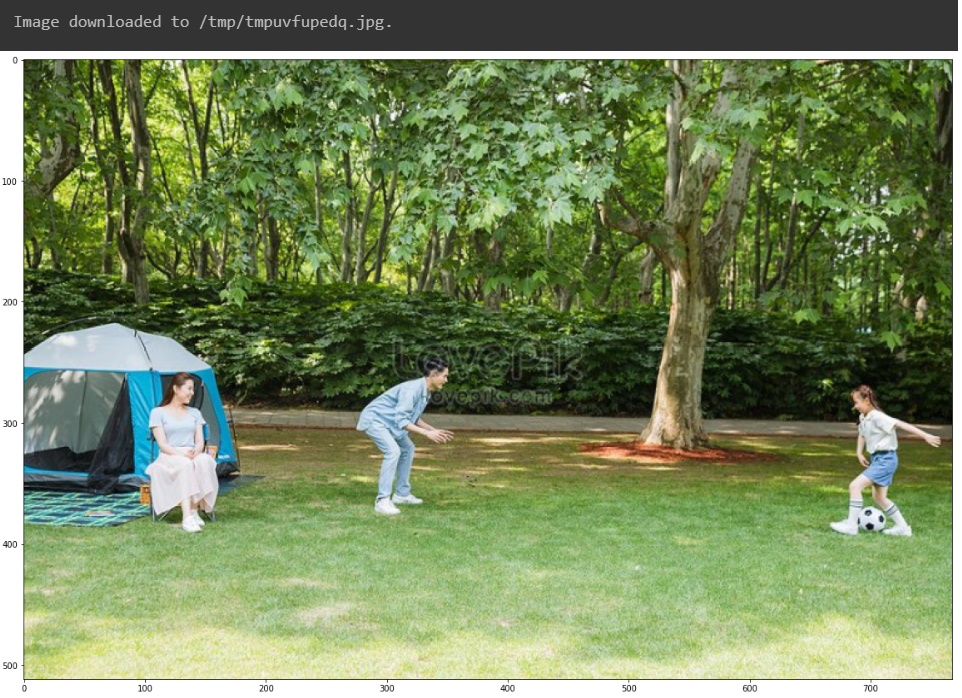

In [ ]:
# 테스트
run_detector(detector, downloaded_image_path)

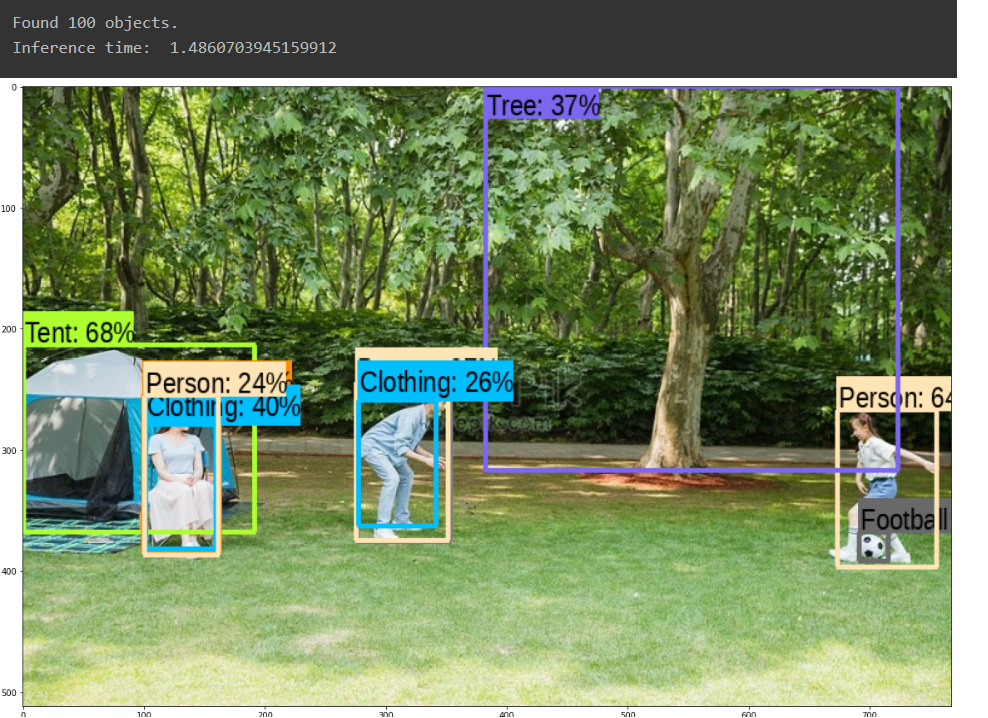

---

#### 문제 2-2. 다양한 pre-trained model 테스트해보기  
Faster RCNN 외에도 Object Detection을 할 수 있는 다양한 사전 학습 모델이 있다.  tfhub을 탐색하여 사용할 수 있는 1개 이상의 모델을 불러와 결과를 테스트해보고, 그 결과를 비교해 보자.

In [ ]:
# 문제 2-2. 모델 불러오기
!pip install git+https://github.com/facebookresearch/segment-anything.git


In [ ]:
# 문제 2-2. 테스트 
# from segment_anything import SamPredictor, sam_model_registry
# sam = sam_model_registry["vit_b"](checkpoint="/kaggle/input/segment-anything/PyTorch/vit-b/1/model.pth")
# predictor = SamPredictor(sam)
# predictor.set_image("C:\Users\whtna\OneDrive\바탕 화면\가족.jpg")
# masks, _, _ = predictor.predict(<input_prompts>)

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint="./Downloads/model.pth")

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image_url)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, len(masks) + 1, i + 1)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title(f"Segment {i + 1}")

# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 ...")

---
<br>  
<br>  
<br>  
<br>  

## 회고  

---

- **Keep**  
    계속해서 구글링하며 찾아보았다.  
    
- **Problem**  
    메모리가 터져서 학습을 진행할 수 없었다.  
    
- **Try**  
    클라우드 환경에서 메모리 관리하는 방법에 대해 알아보았다.